In [1]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [2]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")  # Replace with your filename


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Make sure to load df before running these commands)

# 1. Range of selling prices
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
print("Range of selling prices:", selling_price_range)

Range of selling prices: 755000


In [5]:
# 2. Median selling price
median_selling_price = df['selling_price'].median()
print("Median selling price:", median_selling_price)

Median selling price: 45000.0


In [6]:

# 3. Most common seller type
most_common_seller = df['seller_type'].mode()[0]
print("Most common seller type:", most_common_seller)


Most common seller type: Individual


In [7]:

# 4. Bikes driven more than 50,000 km
bikes_above_50k = df[df['km_driven'] > 50000].shape[0]
print("Number of bikes driven more than 50,000 km:", bikes_above_50k)

Number of bikes driven more than 50,000 km: 170


In [8]:
# 5. Average km_driven for each ownership type
avg_km_per_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven for each ownership type:\n", avg_km_per_ownership)

Average km_driven for each ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [9]:
# 6. Proportion of bikes from 2015 or older
bikes_2015_older = df[df['year'] <= 2015].shape[0] / df.shape[0]
print("Proportion of bikes from 2015 or older:", bikes_2015_older)

Proportion of bikes from 2015 or older: 0.5664467483506126


In [10]:

# 7. Trend of missing values
missing_values = df.isnull().sum()
print("Missing values trend:\n", missing_values)


Missing values trend:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
bike_age               0
price_diff             0
dtype: int64


In [11]:
# 8. Highest ex-showroom price and corresponding bike
highest_ex_showroom_price = df.loc[df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]
print("Bike with highest ex-showroom price:\n", highest_ex_showroom_price)


Bike with highest ex-showroom price:
 name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [12]:
# 9. Total number of bikes listed by each seller type
bikes_per_seller = df['seller_type'].value_counts()
print("Total bikes listed by each seller type:\n", bikes_per_seller)

Total bikes listed by each seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


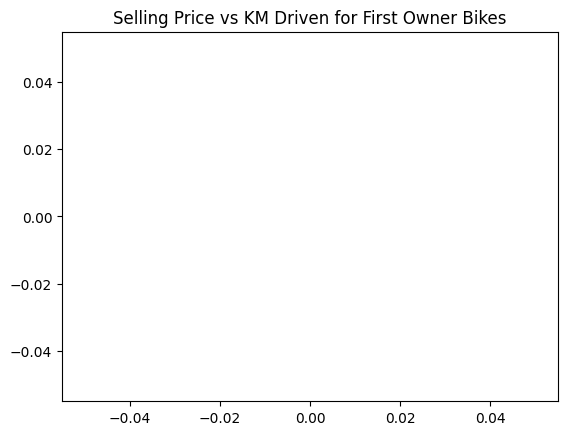

In [13]:
# 10. Relationship between selling_price and km_driven for first-owner bikes
sns.scatterplot(data=df[df['owner'] == 'First Owner'], x='km_driven', y='selling_price')
plt.title("Selling Price vs KM Driven for First Owner Bikes")
plt.show()

In [14]:
# 11. Identify and remove outliers in km_driven using IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[(df['km_driven'] >= (Q1 - 1.5 * IQR)) & (df['km_driven'] <= (Q3 + 1.5 * IQR))]
print("Outliers removed. New dataset shape:", df_cleaned.shape)

Outliers removed. New dataset shape: (1022, 9)


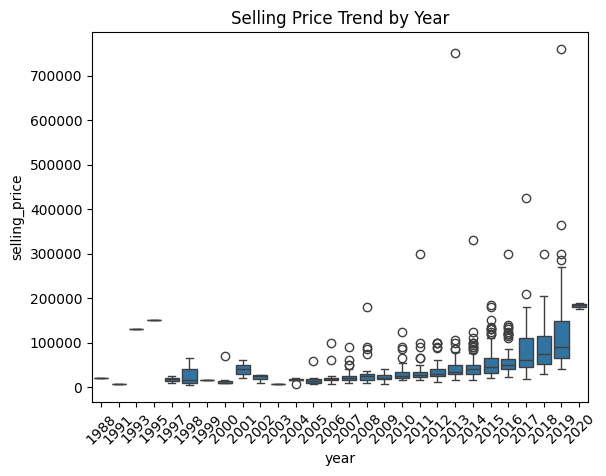

In [15]:
# 12. Bivariate analysis: year vs selling_price
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title("Selling Price Trend by Year")
plt.show()

In [16]:
# 13. Average depreciation in selling price based on bike age
current_year = 2024
df['bike_age'] = current_year - df['year']
avg_depreciation = df.groupby('bike_age')['selling_price'].mean()
print("Average depreciation in selling price by bike age:\n", avg_depreciation)


Average depreciation in selling price by bike age:
 bike_age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


In [17]:
# 14. Bikes priced significantly above average for their manufacturing year
df['price_diff'] = df['selling_price'] - df.groupby('year')['selling_price'].transform('mean')
expensive_bikes = df[df['price_diff'] > df['price_diff'].quantile(0.90)][['name', 'year', 'selling_price']]
print("Bikes priced significantly above average for their year:\n", expensive_bikes)


Bikes priced significantly above average for their year:
                                      name  year  selling_price
0               Royal Enfield Classic 350  2019         175000
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
..                                    ...   ...            ...
967             Royal Enfield Thunder 350  2015         125000
972                         KTM 390 Duke   2016         115000
976             Royal Enfield Classic 350  2015         110000
981             Royal Enfield Thunder 350  2013         105000
985             Royal Enfield Classic 500  2011          90000

[105 rows x 3 columns]


In [22]:

# correlation_matrix = df.corr()
# # Compute correlations for numeric columns
# plt.figure(figsize=(10, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Matrix Heatmap")
# plt.show()


In [28]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [29]:
import pandas as pd
df = pd.read_csv("Car Sale.csv")  # Replace with your filename


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# # Load dataset
# file_path = "/mnt/data/Car Sale.csv"
# df = pd.read_csv(file_path)

# Display dataset info
df.info()

df.head()

# 1. Average Selling Price per Dealer
avg_price_per_dealer = df.groupby("Dealer_Name")["Price ($)"].mean()
print("Average Selling Price per Dealer:\n", avg_price_per_dealer)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
Average Selling Price per Dealer:
 Dealer_Name
Buddy Storbeck's Di

In [31]:
# 2. Car Brand with Highest Variation in Prices
price_variation = df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
print("Car Brand with Highest Price Variation:\n", price_variation)


Car Brand with Highest Price Variation:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


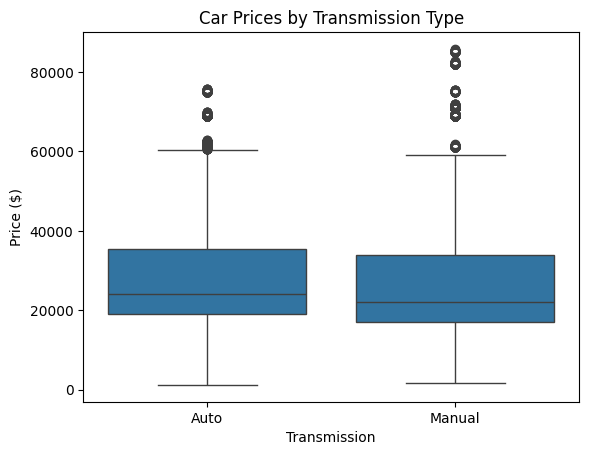

In [32]:
# 3. Distribution of Car Prices for Each Transmission Type
sns.boxplot(x="Transmission", y="Price ($)", data=df)
plt.title("Car Prices by Transmission Type")
plt.show()

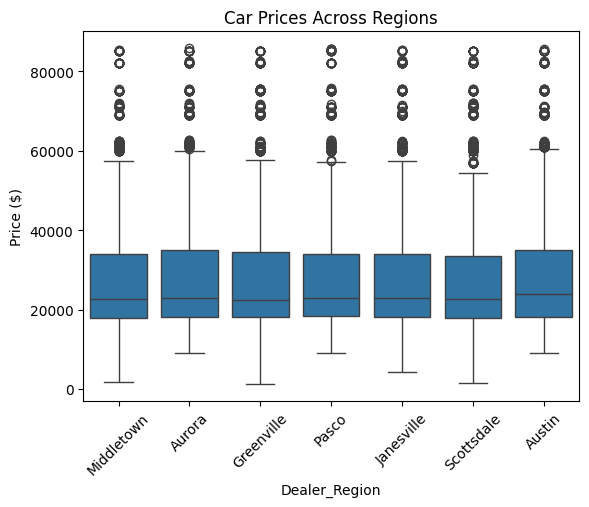

In [33]:
# 4. Distribution of Car Prices Across Regions
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.title("Car Prices Across Regions")
plt.xticks(rotation=45)
plt.show()

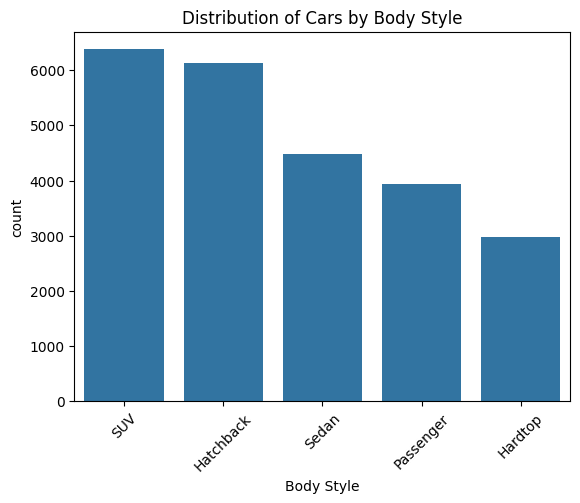

In [34]:
# 5. Distribution of Cars Based on Body Styles
sns.countplot(x="Body Style", data=df, order=df["Body Style"].value_counts().index)
plt.title("Distribution of Cars by Body Style")
plt.xticks(rotation=45)
plt.show()

In [35]:
# 6. Average Selling Price by Customer Gender & Annual Income
gender_income_price = df.groupby(["Gender"])["Price ($)"].mean()
print("Average Selling Price by Gender:\n", gender_income_price)

Average Selling Price by Gender:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


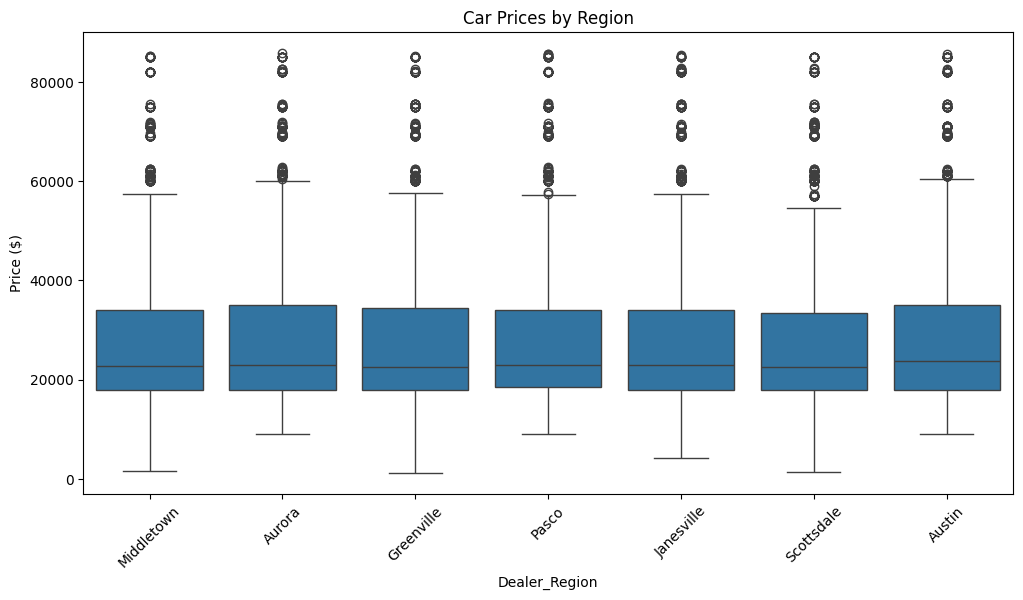

Cars Sold per Region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [36]:
# 7. Distribution of Car Prices by Region & Cars Sold per Region
plt.figure(figsize=(12,6))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.title("Car Prices by Region")
plt.xticks(rotation=45)
plt.show()
sales_by_region = df["Dealer_Region"].value_counts()
print("Cars Sold per Region:\n", sales_by_region)

In [37]:
# 8. Average Car Price by Engine Size
avg_price_engine = df.groupby("Engine")["Price ($)"].mean()
print("Average Car Price by Engine:\n", avg_price_engine)


Average Car Price by Engine:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


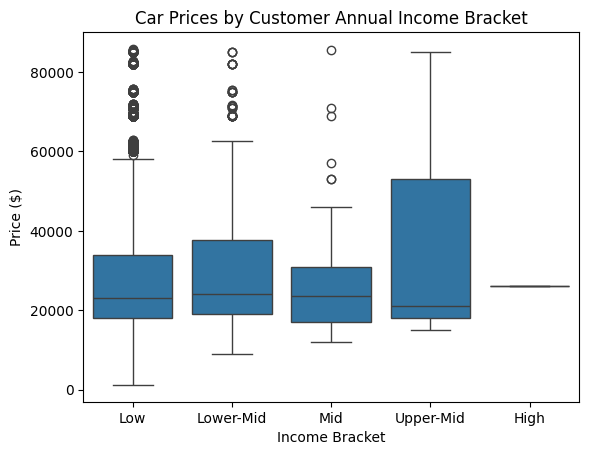

In [38]:
# 9. Car Prices by Customer Annual Income Bracket
df["Income Bracket"] = pd.cut(df["Annual Income"], bins=5, labels=["Low", "Lower-Mid", "Mid", "Upper-Mid", "High"])
sns.boxplot(x="Income Bracket", y="Price ($)", data=df)
plt.title("Car Prices by Customer Annual Income Bracket")
plt.show()

In [39]:
# 10. Top 5 Car Models with Highest Sales
top_models = df["Model"].value_counts().head(5)
print("Top 5 Car Models with Highest Sales:\n", top_models)

Top 5 Car Models with Highest Sales:
 Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


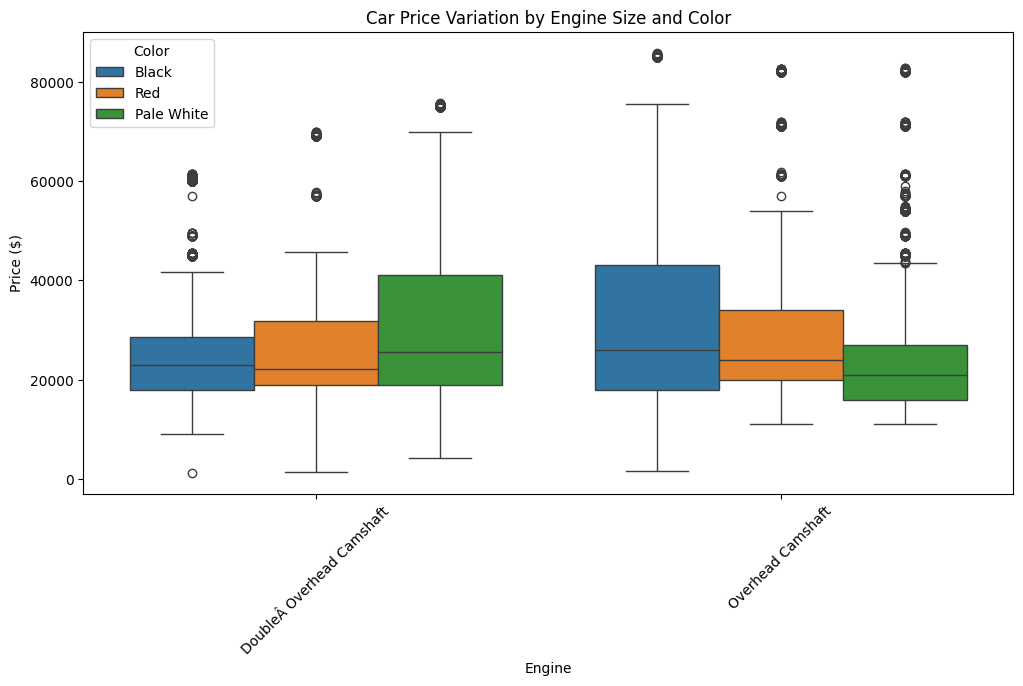

In [40]:
# 11. Car Price Variation by Engine Size & Color
plt.figure(figsize=(12,6))
sns.boxplot(x="Engine", y="Price ($)", hue="Color", data=df)
plt.title("Car Price Variation by Engine Size and Color")
plt.xticks(rotation=45)
plt.show()

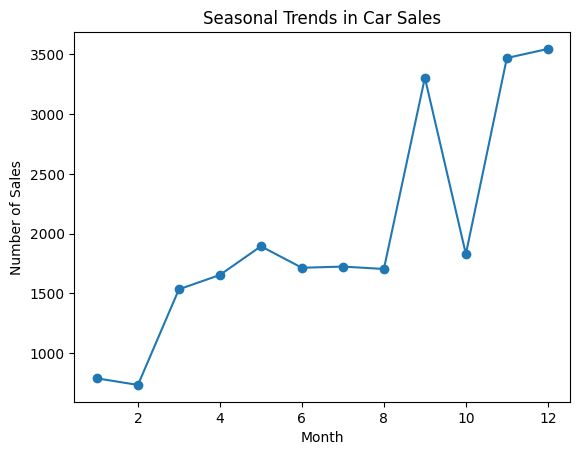

In [41]:
# 12. Seasonal Trends in Car Sales
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df["Month"] = df["Date"].dt.month
monthly_sales = df.groupby("Month")["Car_id"].count()
plt.plot(monthly_sales, marker='o')
plt.title("Seasonal Trends in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.show()

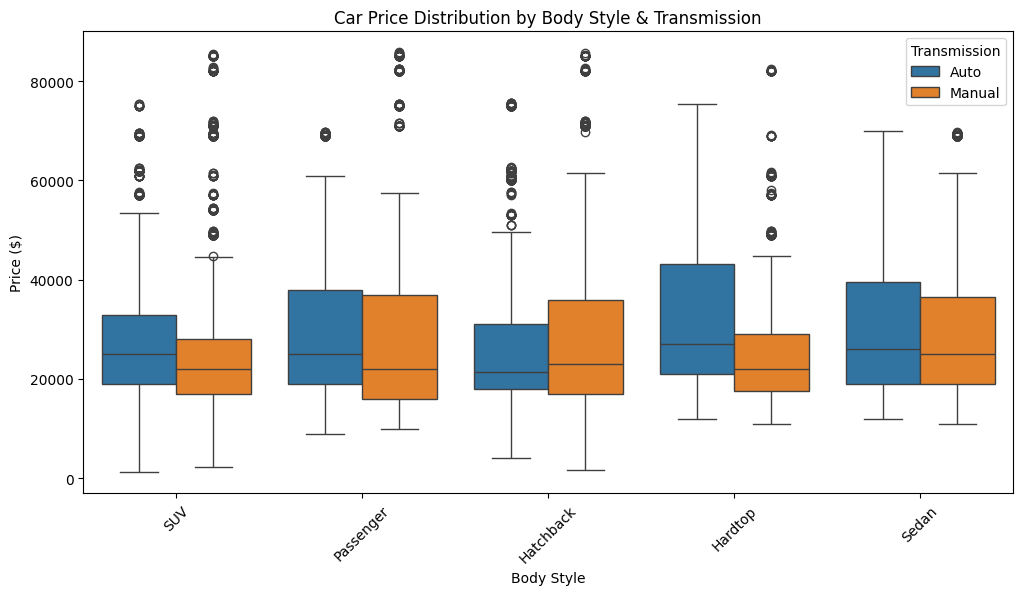

In [42]:
# 13. Car Price Distribution by Body Style & Transmission Type
plt.figure(figsize=(12,6))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.title("Car Price Distribution by Body Style & Transmission")
plt.xticks(rotation=45)
plt.show()


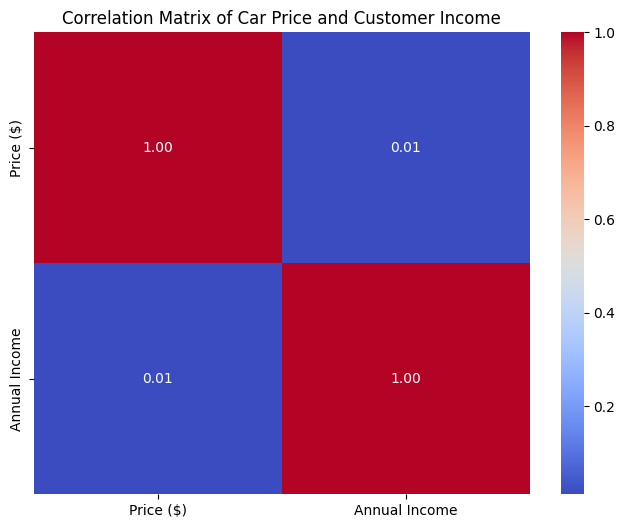

In [43]:

# 14. Correlation Matrix of Price, Engine Size, and Annual Income
corr_matrix = df[["Price ($)", "Annual Income"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Car Price and Customer Income")
plt.show()

In [44]:
# 15. Average Car Price Across Different Car Models and Engine Types
avg_price_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean()
print("Average Car Price Across Models & Engine Types:\n", avg_price_model_engine)

Average Car Price Across Models & Engine Types:
 Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


In [45]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [47]:
import pandas as pd
df = pd.read_csv("amazon.csv")  # Replace with your filename


In [59]:
# 1. Read the DataFrame, Check for Null and Duplicate Values, and Handle Them

import pandas as pd

# # Load the dataset
# file_path = "/mnt/data/amazon.csv"
# df = pd.read_csv(file_path)

# Check for null values
print("Missing Values:\n", df.isnull().sum())

# Handling missing values (if needed)
df.dropna(inplace=True)  # Drop rows with missing values (or use df.fillna(value) if needed)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)

Missing Values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64
Number of duplicate rows: 0


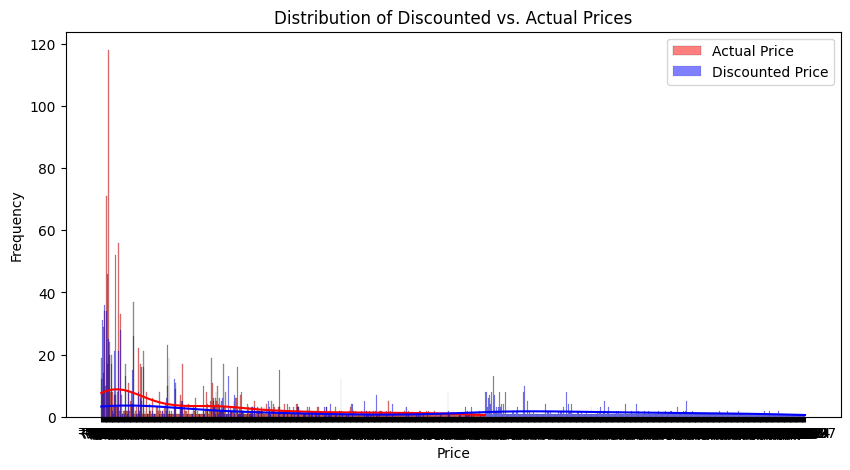

In [60]:
# 2. Distribution of Discounted Prices vs. Actual Prices

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of discounted vs. actual prices
plt.figure(figsize=(10, 5))
sns.histplot(df["actual_price"], bins=30, color="red", label="Actual Price", kde=True)
sns.histplot(df["discounted_price"], bins=30, color="blue", label="Discounted Price", kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Discounted vs. Actual Prices")
plt.legend()
plt.show()

In [62]:
# Convert 'rating' to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")  # Convert and handle errors

# Now compute average rating per category
category_avg_rating = df.groupby("category")["rating"].mean().sort_values(ascending=False)

print(category_avg_rating)


category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [63]:
# 4. Top Rating Count Products by Category

top_rated_products = df.sort_values(by=["rating_count"], ascending=False).groupby("category").head(1)
print(top_rated_products[["category", "product_name", "rating", "rating_count"]])

                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name  rating rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...     NaN          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10     4.3          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with..

In [66]:
# 5. Average Discount Percentage Across Categories

# Remove '%' and convert to numeric
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype(float)

# Now compute the average discount percentage per category
category_avg_discount = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)

print(category_avg_discount)


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                                              0.0
OfficeP

In [65]:
# 6. Most Popular Product Names

popular_products = df["product_name"].value_counts().head(10)
print(popular_products)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)    3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick 

In [82]:
# 7. Most Popular Product Keywords
import nltk
nltk.download('punkt')
nltk.download('stopwords')  # Optional: for filtering common words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [83]:
# Tokenizing all product names using split() as an alternative
all_words = " ".join(df["product_name"].dropna()).lower()
word_tokens = all_words.split()  # Simpler alternative to word_tokenize

# Removing common punctuation manually
filtered_tokens = [word.strip(".,!?()[]") for word in word_tokens if word.isalnum()]

# Counting frequency of words
word_counts = Counter(filtered_tokens)

# Display top 10 most common words
print("Top 10 most common product keywords:")
print(word_counts.most_common(10))


Top 10 most common product keywords:
[('with', 750), ('for', 671), ('usb', 377), ('and', 330), ('cable', 318), ('charging', 217), ('to', 215), ('fast', 209), ('c', 179), ('smart', 171)]


In [68]:
# 8. Most Popular Product Reviews

popular_reviews = df["review_content"].value_counts().head(10)
print(popular_reviews)

review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

In [72]:
# 9. Correlation Between Discounted Price and Rating

# Remove currency symbol and commas, then convert to float
df["discounted_price"] = df["discounted_price"].str.replace("₹", "").str.replace(",", "").astype(float)

# Convert rating column to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Compute correlation
correlation = df["discounted_price"].corr(df["rating"])
print(f"Correlation between Discounted Price and Rating: {correlation}")



Correlation between Discounted Price and Rating: 0.12113187526066266


In [70]:
# 10. Top 5 Categories Based on Highest Ratings

top_categories = df.groupby("category")["rating"].mean().sort_values(ascending=False).head(5)
print(top_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [71]:
# 11. Identify Areas for Improvement or Optimization
# Some observations that could help in optimization:

# Categories with low average ratings might need better products or marketing improvements.
# If higher discounts correlate with better ratings, it suggests customers value affordability.
# Some categories might have very few products with high ratings, meaning more variety could be beneficial.
# Certain keywords appear frequently in product names; optimizing product listings using these keywords could improve visibility.


In [84]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [85]:
import pandas as pd
df = pd.read_csv("amazon.csv")  # Replace with your filename


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7

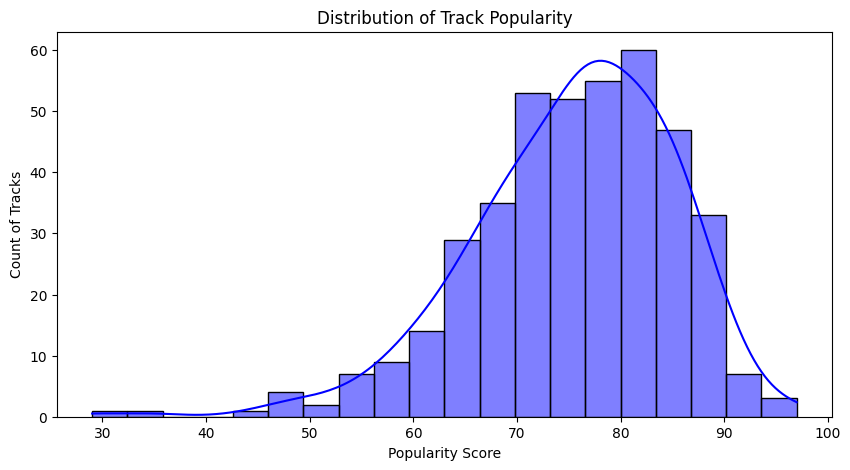

In [86]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "spotify.csv"  # Ensure the file is uploaded in your Colab environment
df = pd.read_csv(file_path)

# Display basic information
df.info()
print(df.head())

# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Remove duplicates if present
df_cleaned = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df_cleaned.shape}")

# 1. Distribution of Popularity
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Popularity"], bins=20, kde=True, color="blue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Count of Tracks")
plt.show()

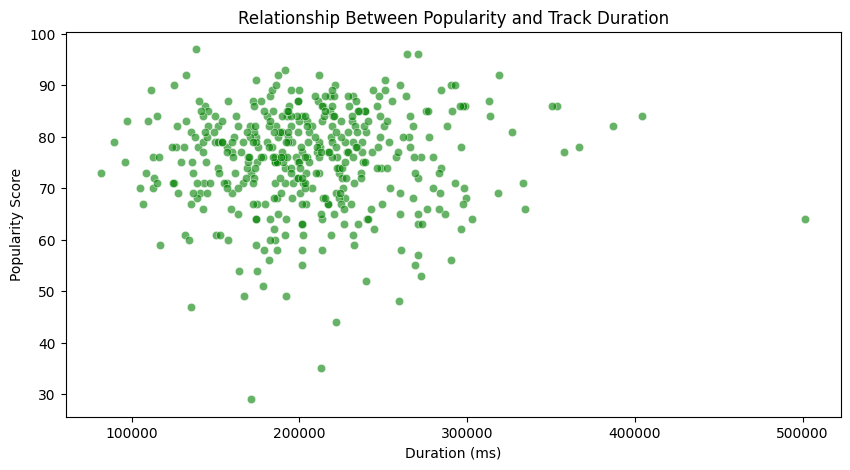

In [87]:
# 2. Relationship Between Popularity and Duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_cleaned["Duration (ms)"], y=df_cleaned["Popularity"], alpha=0.6, color="green")
plt.title("Relationship Between Popularity and Track Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity Score")
plt.show()

<ipython-input-88-b02495ff00f7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")


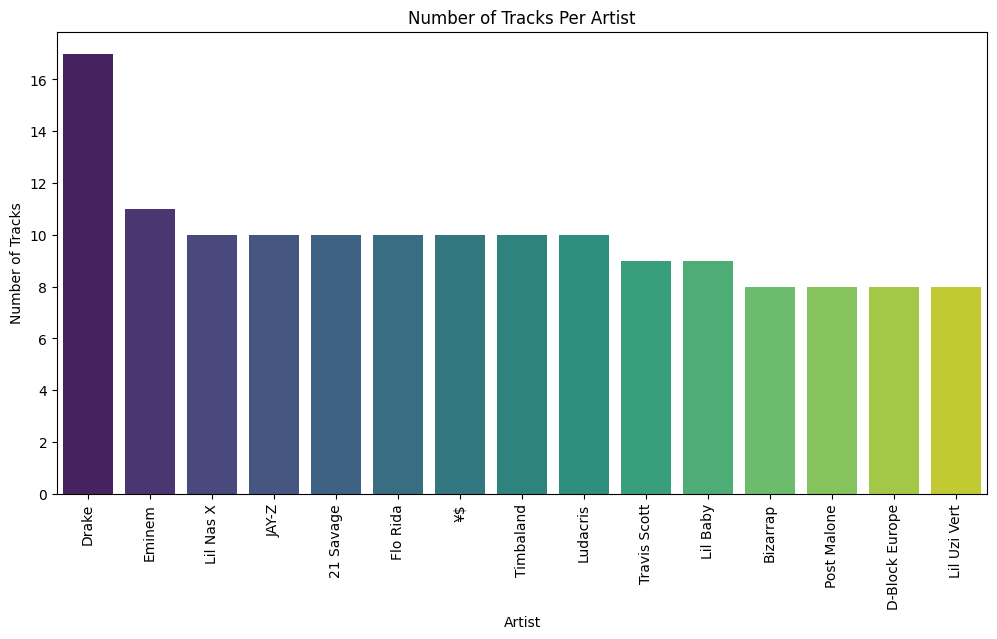

In [88]:
#  3. Count of Tracks per Artist
plt.figure(figsize=(12, 6))
top_artists = df_cleaned["Artist"].value_counts().head(15)  # Top 15 artists
sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Number of Tracks Per Artist")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.show()

In [89]:
# 4. Top 5 Least Popular Tracks
least_popular = df_cleaned.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print("\nTop 5 Least Popular Tracks:\n", least_popular)


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [90]:
# 5. Most Popular Artists (by Track Count) and Their Average Popularity
top_5_artists = df_cleaned["Artist"].value_counts().nlargest(5).index
artist_avg_popularity = df_cleaned[df_cleaned["Artist"].isin(top_5_artists)].groupby("Artist")["Popularity"].mean()
print("\nTop 5 Most Popular Artists and Their Average Popularity:\n", artist_avg_popularity)



Top 5 Most Popular Artists and Their Average Popularity:
 Artist
21 Savage    83.800000
Drake        82.882353
Eminem       83.636364
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [91]:
# 6. Most Popular Track for Each of the Top 5 Artists
most_popular_tracks = df_cleaned[df_cleaned["Artist"].isin(top_5_artists)].sort_values(by=["Artist", "Popularity"], ascending=[True, False])
most_popular_tracks = most_popular_tracks.groupby("Artist").first()[["Track Name", "Popularity"]]
print("\nMost Popular Track for Each of the Top 5 Artists:\n", most_popular_tracks)



Most Popular Track for Each of the Top 5 Artists:
                                         Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
JAY-Z                              Ni**as In Paris          86
Lil Nas X                        THATS WHAT I WANT          81


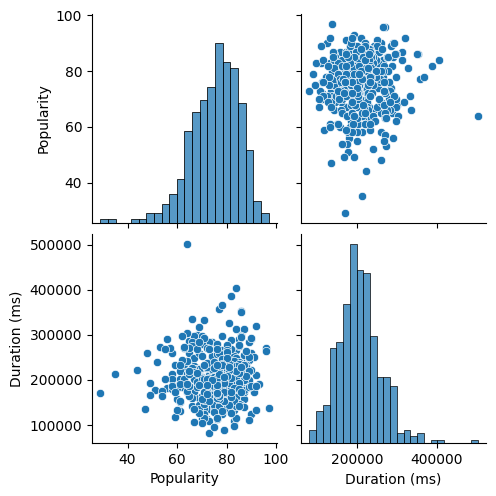

In [92]:
# 7. Pair Plot of Numerical Variables
sns.pairplot(df_cleaned[["Popularity", "Duration (ms)"]])
plt.show()


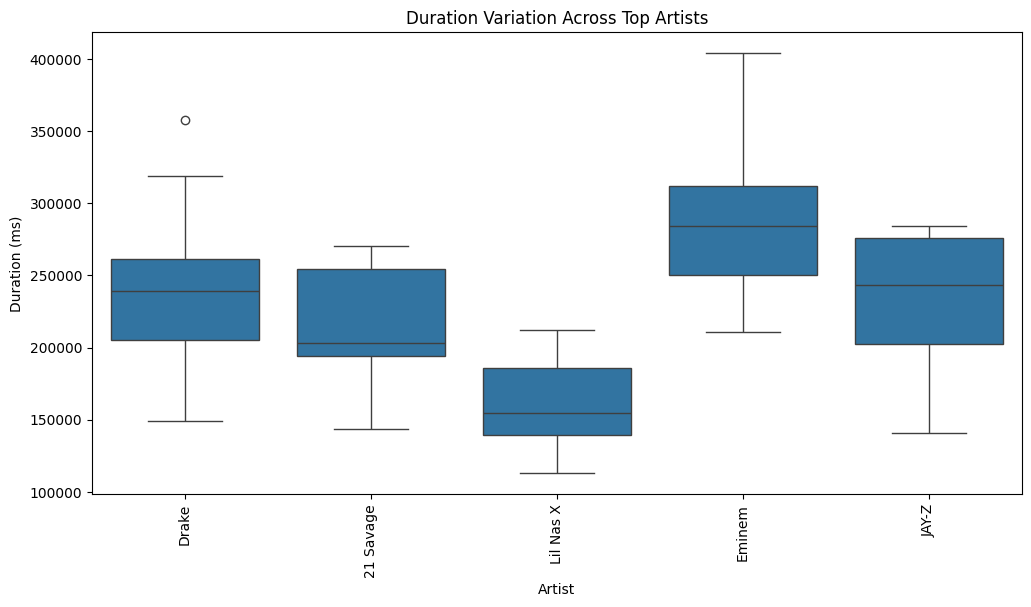

In [93]:

# 8. Box Plot for Duration Variation Across Artists
plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=df_cleaned[df_cleaned["Artist"].isin(top_5_artists)])
plt.xticks(rotation=90)
plt.title("Duration Variation Across Top Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()


<ipython-input-94-aa0315abdc7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Artist", y="Popularity", data=df_cleaned[df_cleaned["Artist"].isin(top_5_artists)], palette="coolwarm")


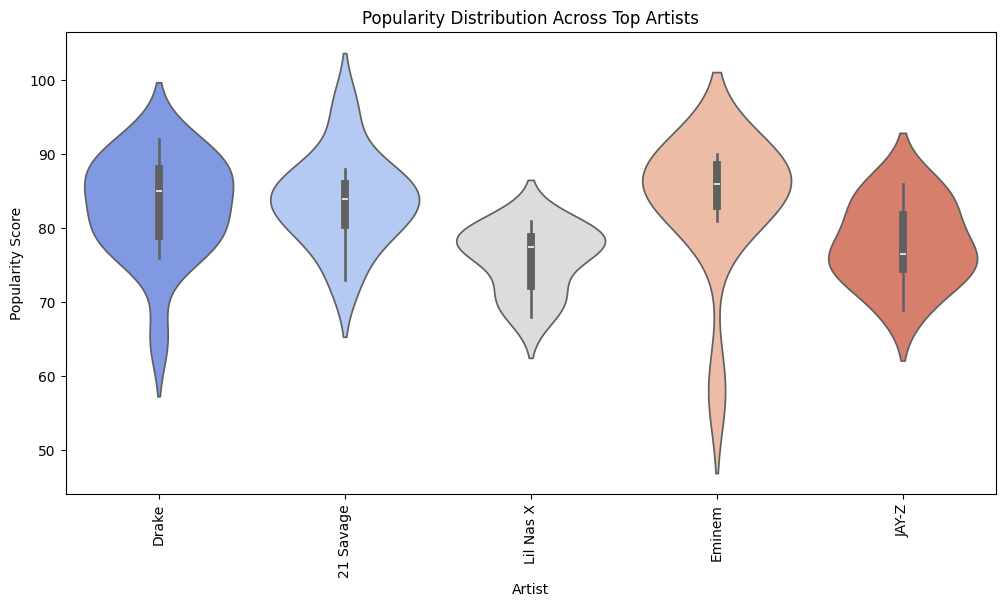

In [94]:
# 9. Swarm Plot for Popularity Distribution Across Artists
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df_cleaned[df_cleaned["Artist"].isin(top_5_artists)], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Popularity Distribution Across Top Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity Score")
plt.show()